**Linear Data**


In [1]:
import pandas as pd
import numpy as np
from hierarchicalcausalmodels.models.HSCM.HSCM import HSCM # type: ignore
import matplotlib.pyplot as plt
from scipy.stats import norm, expon



In [2]:
import json
import os

# Function to save sampled data to a JSON file
def save_sampled_data(data, filename):
    # Delete existing file if it exists
    if os.path.exists(filename):
        os.remove(filename)
    
    # Write new data to file
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)


In [3]:
# Define the HSCM model structure
nodes = ["a", "b", "c", "d", "e"]
edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
unit_nodes = ["a", "c", "e"]
subunit_nodes = ["d", "b"]
sizes = [50] * 50# You can adjust this based on your data

# Initialize the HSCM model
hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)

# Define random functions for each node
random_functions = {
    "a": lambda x: norm.ppf(x, 0, 1),
    "b": lambda x: norm.ppf(x, 0, 1),
    "c": lambda x: norm.ppf(x, 0, 1),
    "d": lambda x: norm.ppf(x, 0, 1),
    "e": lambda x: norm.ppf(x, 0, 1)
}

# Define additive functions for each node
additive_functions = {
    "a": {},
    
    "b": {"a": lambda a: a},
    
    "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
    
    "d": {"b": lambda b: b +1, "c": lambda c: -c},
    
    "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
}


In [4]:

# Set up the HSCM model
hscm.additive_model(additive_functions, random_functions)


In [5]:
sampled_data = hscm.sample_data_after_intervention('_b', lambda x: norm.ppf(x, 0, 1))

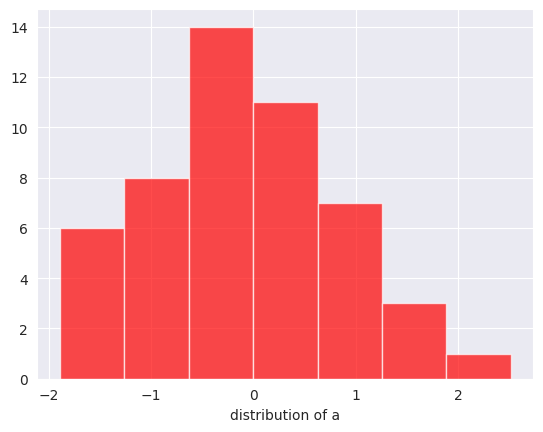

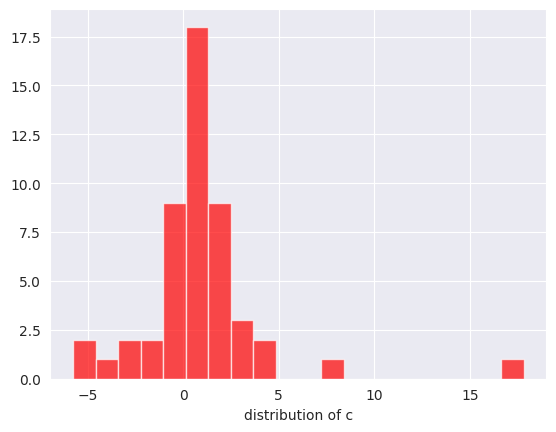

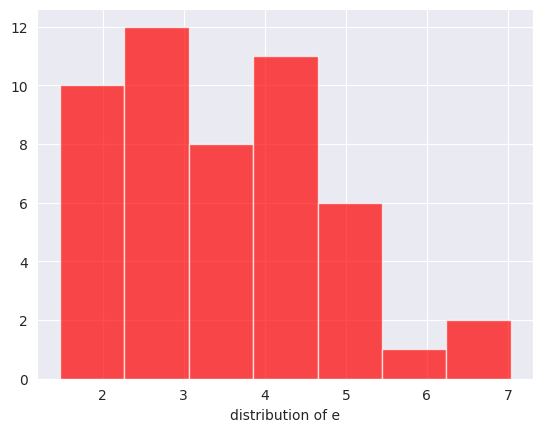

[[-1.6658172305129706,
  -0.7830275362459843,
  -0.014898532248359724,
  2.5117847070317416,
  1.2128427235821369,
  0.2928136246162621,
  -0.07019943670602367,
  0.682317831869648,
  -1.088120955987939,
  -1.5405099730155372,
  -0.04948016378026085,
  -1.8045183757579062,
  0.5842039003769716,
  1.56339371807082,
  -0.21835129830923197,
  1.012162431956402,
  -0.6234158502235447,
  1.7876995442051271,
  -0.352826782871606,
  -0.8593967628075331,
  0.23733853910279698,
  0.320832101953998,
  -1.3474032732005865,
  0.743641790564225,
  -1.2299389528957492,
  -0.8879922681533308,
  0.12264237471811532,
  -0.4764679501541842,
  -0.24117925238454765,
  0.0349115367022296,
  -1.593872934364717,
  -0.3654486482905117,
  1.1576993999796643,
  1.2001027603222938,
  -0.24879866688806174,
  -1.0455865509858693,
  0.21904257908190905,
  -0.4680208782332281,
  -0.9665373946415341,
  -0.23417807053815937,
  1.3996933223064443,
  -1.8897359261131805,
  -0.7014176688906536,
  0.5438675537576484,
  0.

In [6]:

hscm.plot_data()

In [7]:

save_sampled_data(sampled_data, 'data/sampled_data.json')

In [8]:

# Set distributions from the loaded data
hscm.set_distribution_from_data()


In [9]:
# Perform additional analysis or modify the model as needed
# For example, you can change the graph structure or random functions here

# Re-sample data after modifications
new_sampled_data = hscm.resample_data_after_intervention()


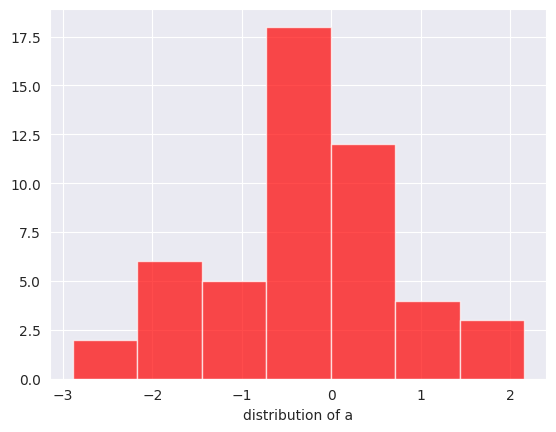

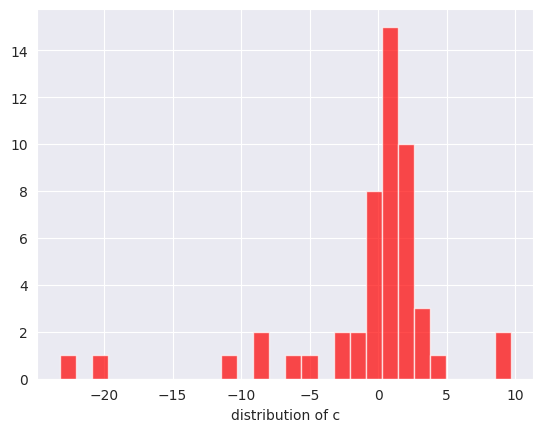

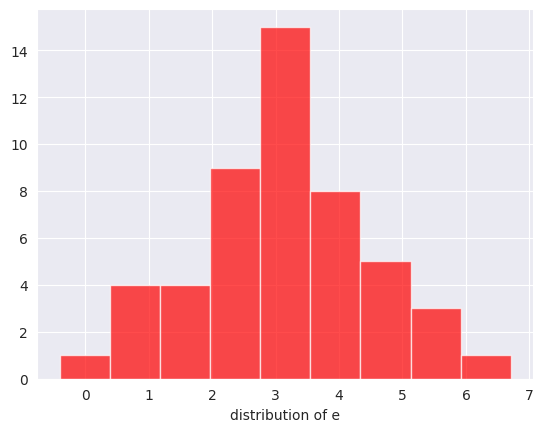

[[-1.6658172305129706,
  -0.7830275362459843,
  -0.014898532248359724,
  2.5117847070317416,
  1.2128427235821369,
  0.2928136246162621,
  -0.07019943670602367,
  0.682317831869648,
  -1.088120955987939,
  -1.5405099730155372,
  -0.04948016378026085,
  -1.8045183757579062,
  0.5842039003769716,
  1.56339371807082,
  -0.21835129830923197,
  1.012162431956402,
  -0.6234158502235447,
  1.7876995442051271,
  -0.352826782871606,
  -0.8593967628075331,
  0.23733853910279698,
  0.320832101953998,
  -1.3474032732005865,
  0.743641790564225,
  -1.2299389528957492,
  -0.8879922681533308,
  0.12264237471811532,
  -0.4764679501541842,
  -0.24117925238454765,
  0.0349115367022296,
  -1.593872934364717,
  -0.3654486482905117,
  1.1576993999796643,
  1.2001027603222938,
  -0.24879866688806174,
  -1.0455865509858693,
  0.21904257908190905,
  -0.4680208782332281,
  -0.9665373946415341,
  -0.23417807053815937,
  1.3996933223064443,
  -1.8897359261131805,
  -0.7014176688906536,
  0.5438675537576484,
  0.

In [10]:

hscm.plot_data_resampled()

In [11]:
print(new_sampled_data)

{'a0': -0.3474117160831207, 'a1': -0.5421084926972345, 'a2': -0.6559624361324577, 'a3': -0.46620668227354556, 'a4': -1.8518703413201034, 'a5': -0.6107231758288149, 'a6': 0.874567087105136, 'a7': 0.6811846887694069, 'a8': -2.75745016497848, 'a9': -2.8874429071245644, 'a10': 0.37890758035152367, 'a11': -0.21158344596623538, 'a12': -0.6557434012706367, 'a13': -1.170625786597709, 'a14': -2.0653617438114162, 'a15': 0.3919300425466875, 'a16': -0.44697887054125984, 'a17': -0.35099906630265165, 'a18': -0.9646836244022776, 'a19': 1.1141863638292213, 'a20': 0.40006589518032976, 'a21': -1.474379636358862, 'a22': -2.1201817309760047, 'a23': 0.011370072660558159, 'a24': 0.6416467280412758, 'a25': -0.6341191126641711, 'a26': 0.5704919132430741, 'a27': 0.5803430733067327, 'a28': -0.5664700522227801, 'a29': 0.5070388526079225, 'a30': -0.3562836700994982, 'a31': 0.6575603621913004, 'a32': -1.0196551179557565, 'a33': -0.9637089418274749, 'a34': -0.050735714878005926, 'a35': -2.070002779934479, 'a36': 2.

In [12]:
save_sampled_data(new_sampled_data, 'data/resampled_data.json')

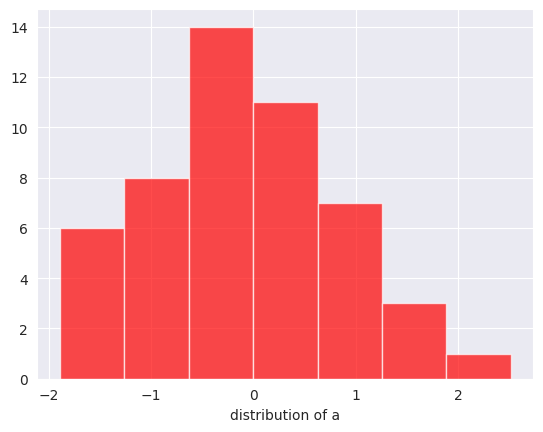

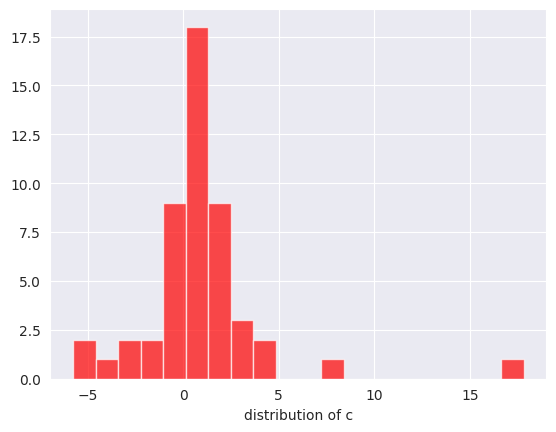

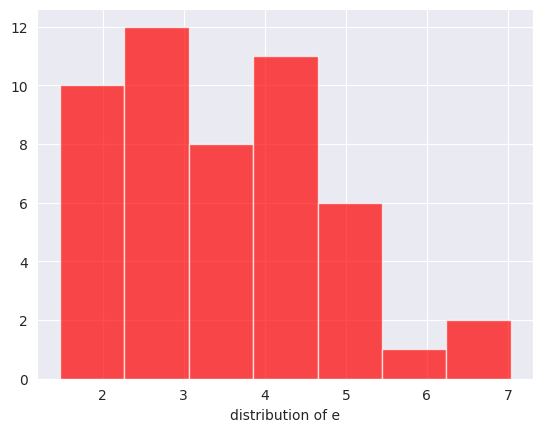

[[-1.6658172305129706,
  -0.7830275362459843,
  -0.014898532248359724,
  2.5117847070317416,
  1.2128427235821369,
  0.2928136246162621,
  -0.07019943670602367,
  0.682317831869648,
  -1.088120955987939,
  -1.5405099730155372,
  -0.04948016378026085,
  -1.8045183757579062,
  0.5842039003769716,
  1.56339371807082,
  -0.21835129830923197,
  1.012162431956402,
  -0.6234158502235447,
  1.7876995442051271,
  -0.352826782871606,
  -0.8593967628075331,
  0.23733853910279698,
  0.320832101953998,
  -1.3474032732005865,
  0.743641790564225,
  -1.2299389528957492,
  -0.8879922681533308,
  0.12264237471811532,
  -0.4764679501541842,
  -0.24117925238454765,
  0.0349115367022296,
  -1.593872934364717,
  -0.3654486482905117,
  1.1576993999796643,
  1.2001027603222938,
  -0.24879866688806174,
  -1.0455865509858693,
  0.21904257908190905,
  -0.4680208782332281,
  -0.9665373946415341,
  -0.23417807053815937,
  1.3996933223064443,
  -1.8897359261131805,
  -0.7014176688906536,
  0.5438675537576484,
  0.

In [13]:


# Plot the new sampled data
hscm.plot_data()


/tmp/ipykernel_24500/3294719767.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=premier_b, shade=True)


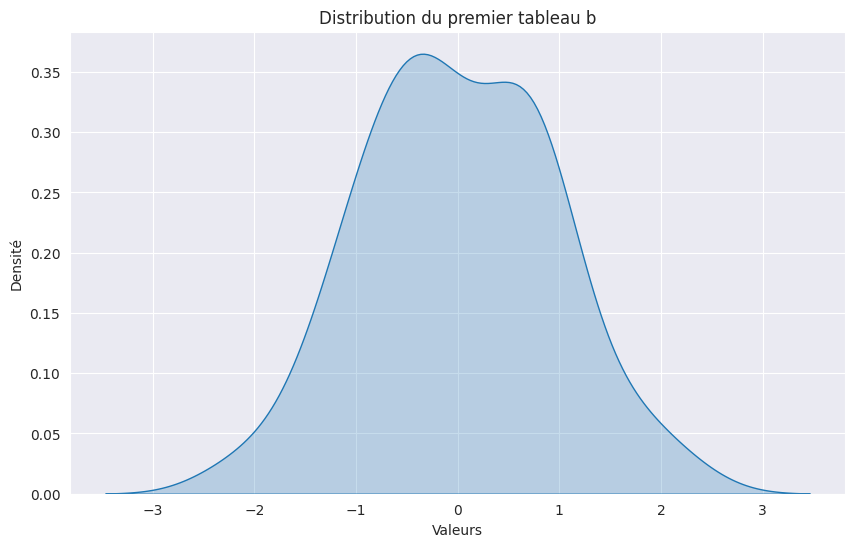

In [18]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Extraction du premier tableau b
premier_b = [sampled_data[f"_b3_{i}"] for i in range(len(sizes))]

# Création de la figure
plt.figure(figsize=(10, 6))

# Tracé de la distribution avec KDE (Kernel Density Estimation) en utilisant Seaborn
sns.kdeplot(data=premier_b, shade=True)

# Personnalisation du graphique
plt.title("Distribution du premier tableau b")
plt.xlabel("Valeurs")
plt.ylabel("Densité")

# Affichage du graphique
plt.show()


In [17]:
print(sampled_data['a3'])

2.5117847070317416


KL Divergence

In [19]:
import tqdm

In [20]:
from scipy.stats import gaussian_kde # type: ignore


In [21]:
def kl_divergence(p, q, bandwidth='scott'):
    """
    Calcule la divergence KL entre deux distributions empiriques représentées par des tableaux,
    en utilisant l'estimation de densité par noyau.
    
    :param p: Premier tableau de données
    :param q: Second tableau de données
    :param bandwidth: Méthode pour estimer la largeur de bande ('scott', 'silverman' ou un nombre)
    :return: Valeur de la divergence KL
    """
    # Assurez-vous que les tableaux ont la même taille
    min_len = min(len(p), len(q))
    p = p[:min_len]
    q = q[:min_len]
    
    # Estimation de densité par noyau
    kde_p = gaussian_kde(p, bw_method=bandwidth)
    kde_q = gaussian_kde(q, bw_method=bandwidth)
    
    # Créez un espace d'échantillonnage
    x = np.linspace(min(np.min(p), np.min(q)), max(np.max(p), np.max(q)), 10000)
    
    # Estimez les densités
    p_density = kde_p(x)
    q_density = kde_q(x)
    
    # Ajoutez un petit epsilon pour éviter la division par zéro
    epsilon = 1e-10
    p_density += epsilon
    q_density += epsilon
    
    # Normalisez les densités
    p_density /= np.sum(p_density)
    q_density /= np.sum(q_density)
    
    # Calculez la divergence KL
    return np.sum(p_density * np.log(p_density / q_density))

In [22]:
def kl_div_deprecated(original, resampled):
    # Calculate histograms
    hist_original, _ = np.histogram(original, bins=50, density=True)
    hist_resampled, _ = np.histogram(resampled, bins=50, density=True)
        
        # Add small constant to avoid division by zero
    hist_original += 1e-10
    hist_resampled += 1e-10
        
        # Normalize
    hist_original /= hist_original.sum()
    hist_resampled /= hist_resampled.sum()
        
        # Calculate KL divergence
    kl_divs = np.sum(hist_original * np.log(hist_original / hist_resampled))
    
    return kl_divs

In [23]:

def run_experiment(k):
    results = []
    for i in tqdm.tqdm(range(k)):
        # Define the HSCM model structure
        nodes = ["a", "b", "c", "d", "e"]
        edges = [("a", "b"), ('a', 'c'), ("b", "c"), ("c", "d"), ("b", "d"), ("d", "e"),("c", "e")]
        unit_nodes = ["a", "c", "e"]
        subunit_nodes = ["d", "b"]
        sizes = [50] * 50# You can adjust this based on your data
        
        # Initialize the HSCM model
        hscm = HSCM(nodes, edges, unit_nodes, subunit_nodes, sizes, node_functions={}, data=None)
        
        # Define random functions for each node
        random_functions = {
            "a": lambda x: norm.ppf(x, 0, 1),
            "b": lambda x: norm.ppf(x, 0, 1),
            "c": lambda x: norm.ppf(x, 0, 1),
            "d": lambda x: norm.ppf(x, 0, 1),
            "e": lambda x: norm.ppf(x, 0, 1)
        }
        # Define additive functions for each node
        additive_functions = {
            "a": {},
            
            "b": {"a": lambda a: a},
            
            "c": {"a": lambda a: a**3, "b": lambda b: (np.mean(np.array(list(b))) +1)**2},
            
            "d": {"b": lambda b: b +1, "c": lambda c: -c},
            
            "e": {"d": lambda d: np.mean(np.array(list(d))) +1, "c": lambda c : np.sqrt(abs(c))}
        }
    
        # Set up the HSCM model
        hscm.additive_model(additive_functions, random_functions)
    
        # Sample data from the model
        sampled_data = hscm.sample_data_after_intervention('_b', lambda x: norm.ppf(x, 0, 1))
        save_sampled_data(sampled_data, f'data/sampled_data_{k}.json') # it's different !
        # Set distributions from the sampled data
        hscm.set_distribution_from_data()
    
        # Resample data
        resampled_data = hscm.resample_data_after_intervention()
        save_sampled_data(resampled_data, f'data/resampled_data_{k}.json')
        
        kl_divergences = {}
        for node in unit_nodes:
            original = [sampled_data[f"{node}{i}"] for i in range(len(sizes))]
            resampled = [resampled_data[f"{node}{i}"] for i in range(len(sizes))]
            
            kl_divergences[node] = kl_divergence(original, resampled)
        
        results.append(kl_divergences)
        
    return results

In [24]:

# Run the experiment 100 times
results = run_experiment(100)


100%|██████████| 100/100 [01:42<00:00,  1.03s/it]


if resampled, should be 0, else should be a certain value

In [25]:
print(results)

[{'a': 0.04837456021023813, 'c': 0.596008441357694, 'e': 0.08970845262781782}, {'a': 0.02918659116795241, 'c': 0.10916667853404645, 'e': 0.031042077380111954}, {'a': 0.02947968502170889, 'c': 0.06495192485717695, 'e': 0.03173423656421098}, {'a': 0.0276294615311857, 'c': 0.07096771238841251, 'e': 0.08642490358586194}, {'a': 0.03761562289670933, 'c': 0.03282344744579678, 'e': 0.03179784547473009}, {'a': 0.04089695548272678, 'c': 0.2907092108211918, 'e': 0.06395565662153468}, {'a': 0.02627584100561902, 'c': 0.12963418772140795, 'e': 0.017851229171133715}, {'a': 0.04580449970933567, 'c': 0.3607521971969983, 'e': 0.04914091343253524}, {'a': 0.1915343229012724, 'c': 0.5297969118399461, 'e': 0.0951677808570582}, {'a': 0.031245238873389924, 'c': 0.2049910653629897, 'e': 0.25841673586228586}, {'a': 0.06798878676200532, 'c': 0.7811457247982325, 'e': 0.16882995074506266}, {'a': 0.06656870052413295, 'c': 0.2190953892517602, 'e': 0.03631517070917856}, {'a': 0.052427804490385005, 'c': 0.229907880488

/tmp/ipykernel_24500/1790404846.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


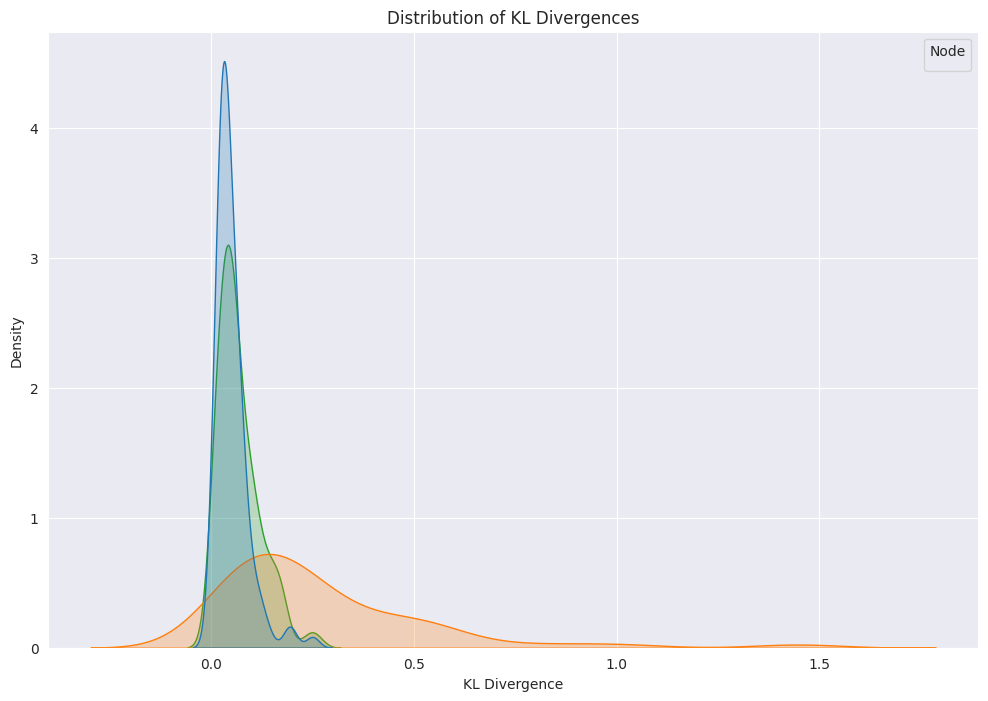

a:
  Mean: 0.0503
  Std Dev: 0.0402
  Min: 0.0039
  Max: 0.2504

c:
  Mean: 0.2737
  Std Dev: 0.2657
  Min: 0.0221
  Max: 1.4680

e:
  Mean: 0.0685
  Std Dev: 0.0512
  Min: 0.0041
  Max: 0.2584



In [26]:
# Analyze the results
import seaborn as sns
import pandas as pd

kl_divergences = {node: [result[node] for result in results] for node in results[0].keys()}

# Convert the data to a long format suitable for seaborn
df = pd.DataFrame([(node, div) for node, divs in kl_divergences.items() for div in divs],
                  columns=['Node', 'KL Divergence'])

# Plot the distribution of KL divergences for each node using KDE
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df, x='KL Divergence', hue='Node', shade=True)
plt.xlabel('KL Divergence')
plt.ylabel('Density')
plt.title('Distribution of KL Divergences')
plt.legend(title='Node')
plt.show()

# Print summary statistics
for node, divergences in kl_divergences.items():
    print(f"{node}:")
    print(f"  Mean: {np.mean(divergences):.4f}")
    print(f"  Std Dev: {np.std(divergences):.4f}")
    print(f"  Min: {np.min(divergences):.4f}")
    print(f"  Max: {np.max(divergences):.4f}")
    print()

AUC

In [27]:

def load_data_from_json(file_path):
    """
    Load data from a JSON file and return it as a dictionary.
    
    :param file_path: Path to the JSON file
    :return: Dictionary containing the loaded data
    """
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(f"Data successfully loaded from {file_path}")
        return data
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except json.JSONDecodeError:
        print(f"Error: Invalid JSON format in {file_path}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {str(e)}")
        return None



In [28]:

# Specify the path to your JSON file
json_file_path = 'data/sampled_data.json'

# Load the data
data_dict = load_data_from_json(json_file_path)

# Check if data was loaded successfully
if data_dict is not None:
    print("Data loaded successfully. You can now use data_dict in your analysis.")
else:
    print("Failed to load data. Please check the file path and format.")


Data successfully loaded from data/sampled_data.json
Data loaded successfully. You can now use data_dict in your analysis.


In [29]:
data_dict_resampled = load_data_from_json('data/resampled_data.json')

Data successfully loaded from data/resampled_data.json


In [30]:
def create_vector(data, sizes):
    vectors = []
    current_index = 0
    for i, size in enumerate(sizes):
        for j in range(size):
            vector = [
                #data[f'a{i}'],  # Unit node 'a' for the school
                data[f'_b{i}_{j}'],  # Subunit node 'b' for this specific child
                #data[f'c{i}'],  # Unit node 'c' for the school
                data[f'_d{i}_{j}'],  # Subunit node 'd' for this specific child
                #data[f'e{i}']   # Unit node 'e' for the school
            ]
            vectors.append(vector)
            current_index += 1
    return np.array(vectors)



In [31]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier



In [32]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

def hscm_classification_pipeline(X, y):
    # Train a Random Forest classifier
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot feature importances
    #feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
    #importances = clf.feature_importances_
    #indices = np.argsort(importances)[::-1]

    #plt.figure(figsize=(10, 6))
    #plt.title("Feature Importances")
    #plt.bar(range(len(feature_names)), importances[indices])
    #plt.xticks(range(len(feature_names)), [feature_names[i] for i in indices], rotation=90)
    #plt.tight_layout()
    #plt.show()

    return accuracy


In [33]:

original_vectors = create_vector(data_dict, sizes)
new_vectors = create_vector(data_dict_resampled, sizes)
X = np.vstack((original_vectors, new_vectors))
y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new


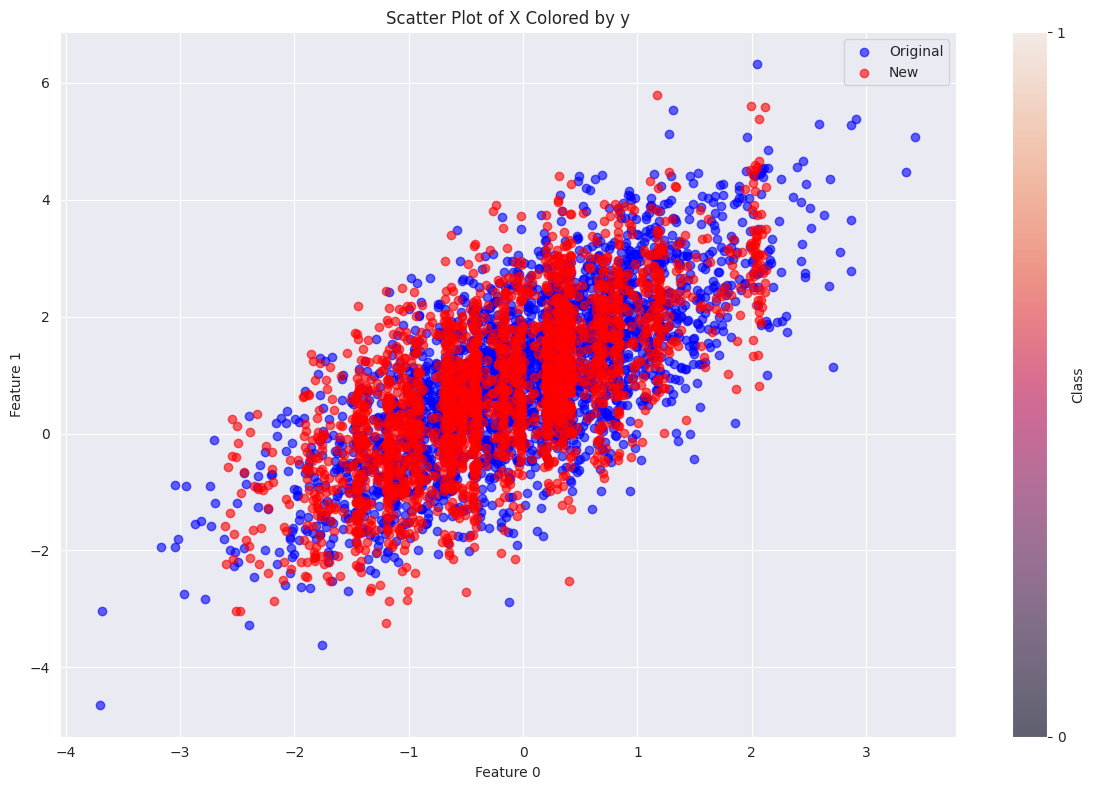

In [34]:
# Plotting X according to its color in y

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Plot points for y=0 (original vectors)
plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Original', alpha=0.6)

# Plot points for y=1 (new vectors)
plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='New', alpha=0.6)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of X Colored by y')
plt.legend()

# Add a colorbar
plt.colorbar(ticks=[0, 1], label='Class')

plt.tight_layout()
plt.show()


In [35]:
hscm_classification_pipeline(X, y)

Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       500
           1       0.55      0.50      0.52       500

    accuracy                           0.54      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.54      0.54      0.54      1000



0.543

In [36]:
def run_classification(k):
    list = []
    for i in range(k):
        data_dict = load_data_from_json(f'data/sampled_data_{i}.json')
        data_dict_resampled = load_data_from_json(f'data/resampled_data_{i}.json')        
        original_vectors = create_vector(data_dict, sizes)
        new_vectors = create_vector(data_dict_resampled, sizes)
        X = np.vstack((original_vectors, new_vectors))
        y = np.array([0]*len(original_vectors) + [1]*len(new_vectors))  # 0 for original, 1 for new
        accuracy_score = hscm_classification_pipeline(X, y)
        list.append(accuracy_score)
    return list

In [37]:
liste = run_classification(100)

Data successfully loaded from data/sampled_data_0.json
Data successfully loaded from data/resampled_data_0.json
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       500
           1       0.87      0.81      0.84       500

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000

Data successfully loaded from data/sampled_data_1.json
Data successfully loaded from data/resampled_data_1.json
Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84       500
           1       0.86      0.79      0.82       500

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000

Data successfully loaded from data/sampled_dat

In [38]:
print(liste)

[0.846, 0.83, 0.82, 0.854, 0.841, 0.809, 0.86, 0.875, 0.856, 0.858, 0.618, 0.838, 0.844, 0.877, 0.826, 0.849, 0.855, 0.872, 0.847, 0.803, 0.819, 0.855, 0.814, 0.838, 0.848, 0.833, 0.847, 0.84, 0.86, 0.523, 0.489, 0.514, 0.488, 0.517, 0.545, 0.483, 0.532, 0.516, 0.492, 0.56, 0.527, 0.565, 0.558, 0.514, 0.526, 0.516, 0.512, 0.489, 0.517, 0.544, 0.543, 0.524, 0.506, 0.557, 0.469, 0.527, 0.54, 0.521, 0.499, 0.524, 0.511, 0.492, 0.523, 0.544, 0.549, 0.531, 0.542, 0.509, 0.519, 0.568, 0.517, 0.521, 0.519, 0.559, 0.506, 0.519, 0.538, 0.557, 0.512, 0.517, 0.489, 0.526, 0.524, 0.523, 0.542, 0.522, 0.532, 0.514, 0.538, 0.574, 0.547, 0.525, 0.54, 0.542, 0.499, 0.534, 0.562, 0.564, 0.516, 0.523]


In [39]:
print(np.mean(np.array(liste)))

0.61558


In [40]:
print(np.std(np.array(liste)))

0.14389956080544514
